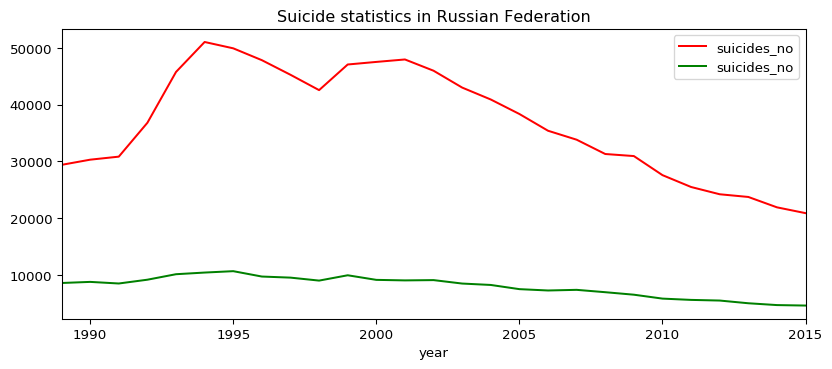

In [2]:
'''
Проиллюстрировать работу следующих функций
библиотеки pandas на каком-либо публичном датасете:

1) функций df.groupby()

2) pd.pivot_table()

3) добавление и удаление мультииндексов

Использование matplotlib (можно функции, встроенные в pandas, 
а можно использовать и саму библиотеку. Использование их комбинации,
т.е. создание графика с помощью встроенных функций pandas,
но на основе контекста, сформированного matplotlib, будет плюсом)
'''

import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

src_df = pd.read_csv("suicides.csv")

'''
Метод groupby() класса DataFrame создаёт MultiIndex
на основе объекта, принимая в качестве аргумента
упорядоченный список из элементов его columns.names,
и возвращает объект класса DataFrameGroupBy
или SeriesGroupBy - в зависимости от глубины
сформированного индекса.
Построим иерархию [Страна, Год, Пол]
'''
df_groupby = src_df.groupby(by=['country', 'year', 'sex'])

'''
Подсчитаем по каждой стране
общее ежегодное число жертв суицида
среди мужчин и женщин
'''
data = df_groupby["suicides_no"].sum()

'''
Полученный объект data является экземляром класса DataFrame
проиндексированный MultiIndex
'''

'''
Построим графики для страны с наибольшим
числом жертв суицида за всю статистику наблюдения
'''
df_total_per_country = src_df.pivot_table(columns=["country"], values=["suicides_no"], aggfunc=np.sum)
max_country = df_total_per_country.idxmax(axis=1)
# или:
max_country = src_df.groupby(["country"])["suicides_no"].sum().idxmax(axis=0)

plt.figure(figsize=(10, 4), dpi=96)
ax = plt.subplot(1, 1, 1)
ax.set_title("Suicide statistics in {}".format(max_country))

'''
Воспользуемся MultiIndex для доступа
к интересующим нас выборкам, после чего
сбросимMultiIndex, чтобы получить доступ к
табличному соответствию [Год, Количество]
'''
data.loc[max_country, :, 'male'].reset_index().plot(x='year', y='suicides_no', ax=ax, style="r-")
data.loc[max_country, :, 'female'].reset_index().plot(x='year', y='suicides_no', ax=ax, style="g-")